In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

Importing data

In [2]:
data=pd.read_csv('Salary_Data.csv')
print(data.head())

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


Knowing about data

In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Checking for null entries

In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Shuffling the data

In [6]:
np.random.shuffle(data.values)

Splitting the data 

In [7]:
x=data.iloc[:,0].values.reshape(-1,1)
y=data.iloc[:,1].values.reshape(-1,1)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:

print(x_train.size)

24


In [10]:
print(x_test.size)

6


Building and training the model

In [11]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

Testing the model

In [12]:
y_pre=LR.predict(x_test)
print(y_pre)

[[114822.03947308]
 [ 35951.75805643]
 [ 92287.67335404]
 [ 67875.44339174]
 [ 89470.87758916]
 [ 75386.89876476]]


Testing accuracy

In [13]:
print(LR.score(x_train,y_train))

0.955721012684386


Training accuracy

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pre)
#print(LR.score(x_train,y_train))

0.9577682665487611

Visualising the result

Training result

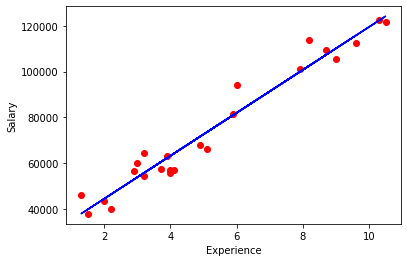

In [15]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,LR.predict(x_train),color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

Test result

Text(0, 0.5, 'Salary')

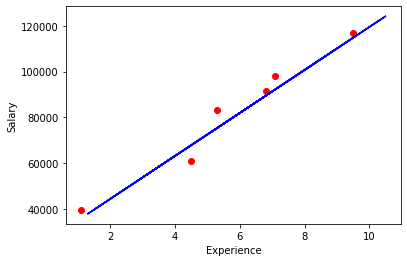

In [16]:
plt.plot(x_train,LR.predict(x_train),color='blue')
plt.scatter(x_test,y_test,color='red')
plt.xlabel('Experience')
plt.ylabel('Salary')